##Trabalho Tech Challenge 4 - Forecast de Petroleo Brent


##Código

###Instalando Bibliotecas e Importando

In [ ]:
!pip install requests pandas

In [ ]:
!pip install ipeadatapy dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 53.1 MB/s eta 0:00:00


In [ ]:
import ipeadatapy as ip
import pandas as pd
import matplotlib.pyplot as plt
import dash
import numpy as np
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

###Importando séries do IPEA
Uma Lista de todas as séries é importada aqui, e logo após é escolhida a série de interesse

In [ ]:
series = ip.list_series()
print(series)

                     CODE                                               NAME
0            ABATE_ABPEAV                   Abate - aves - peso das carcaças
1            ABATE_ABPEBV                Abate - bovinos - peso das carcaças
2            ABATE_ABPESU                 Abate - suínos - peso das carcaças
3            ABATE_ABQUAV                          Abate - aves - quantidade
4            ABATE_ABQUBV                       Abate - bovinos - quantidade
...                   ...                                                ...
8974  PNADCT_TXPARTCUF_SI  Taxa de participação - sem instrução ou equiva...
8975           PNAD_IAGRV         Domicílios com insegurança alimentar grave
8976           PNAD_IALEV          Domicílios com insegurança alimentar leve
8977           PNAD_IAMOD      Domicílios com insegurança alimentar moderada
8978           PNAD_SATOT                 Domicílios com segurança alimentar

[8979 rows x 2 columns]


Escolhendo a série que queremos analisar

In [ ]:
data = ip.timeseries('EIA366_PBRENT366')
print(data.head(5))

                        CODE                   RAW DATE  DAY  MONTH  YEAR  \
DATE                                                                        
1986-01-04  EIA366_PBRENT366  1986-01-04T00:00:00-02:00    4      1  1986   
1986-01-05  EIA366_PBRENT366  1986-01-05T00:00:00-02:00    5      1  1986   
1986-01-06  EIA366_PBRENT366  1986-01-06T00:00:00-02:00    6      1  1986   
1986-01-07  EIA366_PBRENT366  1986-01-07T00:00:00-02:00    7      1  1986   
1986-01-08  EIA366_PBRENT366  1986-01-08T00:00:00-02:00    8      1  1986   

            VALUE (US$)  
DATE                     
1986-01-04          NaN  
1986-01-05          NaN  
1986-01-06          NaN  
1986-01-07          NaN  
1986-01-08          NaN  


###Plotando os dados importados

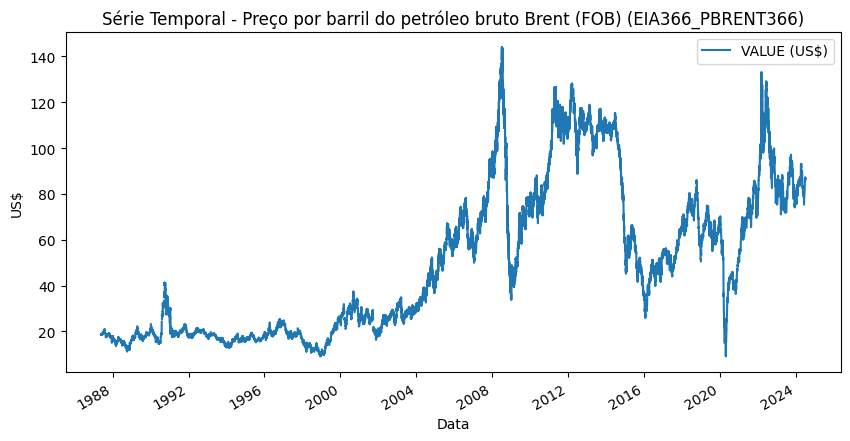

In [ ]:
data[["VALUE (US$)"]].plot(figsize=(10, 5))
plt.title("Série Temporal - Preço por barril do petróleo bruto Brent (FOB) (EIA366_PBRENT366)")
plt.xlabel("Data")
plt.ylabel("US$")
plt.show()

Criando dataframe "data" para conter os dados, e setando o indice

In [ ]:
data = data[["VALUE (US$)"]]
data.rename(columns={"VALUE (US$)": "Price"}, inplace=True)
data.index.name = "date"
data = data.dropna()
print(data)

            Price
date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
...           ...
2024-06-25  86.81
2024-06-26  85.76
2024-06-27  87.00
2024-06-28  87.26
2024-07-01  86.57

[11203 rows x 1 columns]


<ipython-input-7-d67f6d656370>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"VALUE (US$)": "Price"}, inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11203 entries, 1987-05-20 to 2024-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   11203 non-null  float64
dtypes: float64(1)
memory usage: 175.0 KB


###Calculando média do preço em cada ano

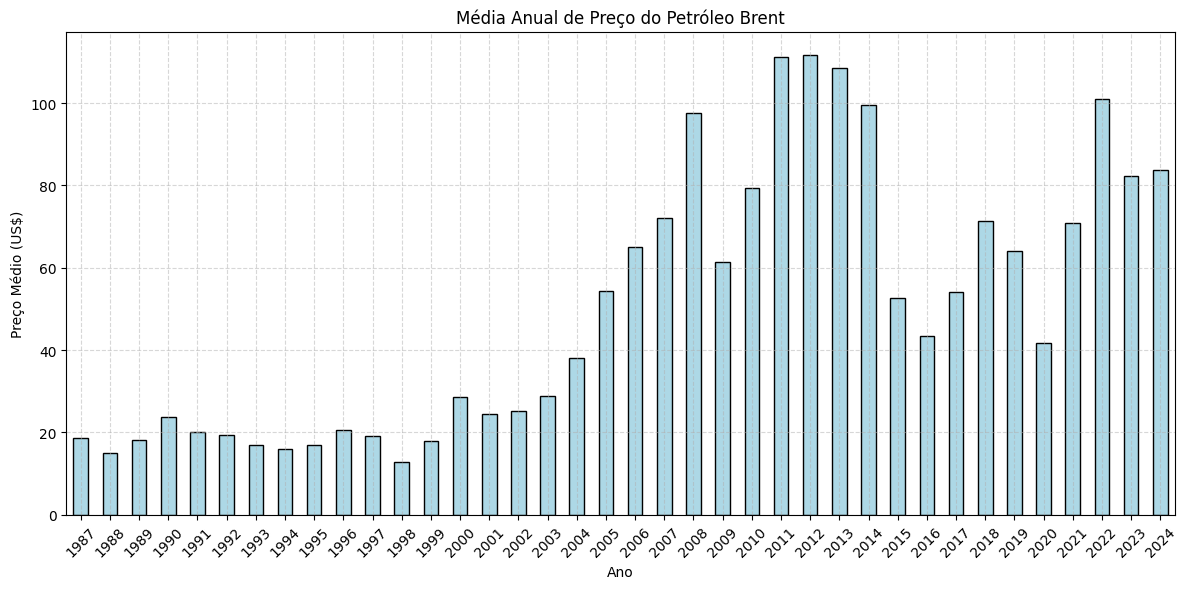

In [ ]:
data.index = pd.to_datetime(data.index)
# Calcular a média de cada ano
media_por_ano = data.groupby(data.index.year)['Price'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
media_por_ano.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Ano')
plt.ylabel('Preço Médio (US$)')
plt.title('Média Anual de Preço do Petróleo Brent')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Criação do dashboard interativo

In [ ]:
# Verificar as colunas disponíveis para garantir que os dados foram carregados corretamente
print(data.columns)

# Passo 2: Criar a aplicação Dash
app = dash.Dash(__name__)

# Layout do Dashboard
app.layout = html.Div([
    html.H1("Dashboard de Preços do Petróleo"),
    dcc.Graph(id='price-time-series'),

    # Seção de Insights
    html.Div([
        html.H2("Insights sobre o Preço do Petróleo"),

        # Insight 1: Impacto da Geopolítica
        html.H3("Impacto da Geopolítica"),
        dcc.Graph(id='geopolitical-impact'),
        html.P("Análise do impacto de eventos geopolíticos nos preços do petróleo. Inclui eventos como conflitos, sanções e outras perturbações que afetam a oferta e demanda."),

        # Insight 2: Efeitos das Crises Econômicas
        html.H3("Efeitos das Crises Econômicas"),
        dcc.Graph(id='economic-crises'),
        html.P("Efeitos de crises econômicas globais e regionais no mercado de petróleo. Inclui a análise de recessões, depressões e crises financeiras."),

        # Insight 3: Demanda Global por Energia
        html.H3("Demanda Global por Energia"),
        dcc.Graph(id='global-demand'),
        html.P("A relação entre a demanda global por energia e as flutuações nos preços do petróleo. Inclui dados de consumo de energia por setor e região."),

        # Insight 4: Tendências Futuras
        html.H3("Tendências Futuras"),
        dcc.Graph(id='future-trends'),
        html.P("Identificação de tendências futuras com base em padrões históricos e dados disponíveis. Inclui previsões e análise de possíveis cenários futuros."),
    ])
])

# Callback para atualizar o gráfico principal de série temporal
@app.callback(
    Output('price-time-series', 'figure'),
    Input('price-time-series', 'id')
)
def update_main_graph(_):
    # Criar um gráfico de linha mostrando a variação do preço do petróleo ao longo do tempo
    fig = px.line(data, x=data.index, y='Price', title='Variação do Preço do Petróleo ao Longo do Tempo')
    fig.update_xaxes(title_text='data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Callback para o impacto da geopolítica
@app.callback(
    Output('geopolitical-impact', 'figure'),
    Input('geopolitical-impact', 'id')
)
def update_geopolitical_impact(_):
    # Exemplo simples, substitua com sua análise geopolítica real
    fig = px.scatter(data, x=data.index, y='Price', title='Impacto da Geopolítica nos Preços do Petróleo')
    fig.update_xaxes(title_text='data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Callback para os efeitos das crises econômicas
@app.callback(
    Output('economic-crises', 'figure'),
    Input('economic-crises', 'id')
)
def update_economic_crises(_):
    # Exemplo simples, substitua com sua análise de crises econômicas real
    fig = px.scatter(data, x=data.index, y='Price', title='Efeitos das Crises Econômicas nos Preços do Petróleo')
    fig.update_xaxes(title_text='data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Callback para a demanda global por energia
@app.callback(
    Output('global-demand', 'figure'),
    Input('global-demand', 'id')
)
def update_global_demand(_):
    # Exemplo simples, substitua com sua análise de demanda global real
    fig = px.scatter(data, x=data.index, y='Price', title='Demanda Global por Energia e Preços do Petróleo')
    fig.update_xaxes(title_text='data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Callback para as tendências futuras
@app.callback(
    Output('future-trends', 'figure'),
    Input('future-trends', 'id')
)
def update_future_trends(_):
    # Exemplo simples, substitua com sua análise de tendências futuras real
    fig = px.scatter(data, x=data.index, y='Price', title='Tendências Futuras dos Preços do Petróleo')
    fig.update_xaxes(title_text='data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Passo 3: Executar o aplicativo
if __name__ == '__main__':
    app.run_server(debug=True)


Index(['Price'], dtype='object')


<IPython.core.display.Javascript object>

###Machine learning com Random Forest Regressor

####Divisão dados de Treino

In [ ]:
# divisão manual dos dados de treino e teste
train_size = int(len(data) * 0.9)
train, test = data.iloc[:train_size], data.iloc[train_size:]

#### Configurando modelo, pipeline, e treinando

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# classe customizada para engenharia de features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, target, lags, window_size):
        self.target = target
        self.lags = lags
        self.window_size = window_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for lag in range(1, self.lags + 1):
            X[f"lag_{lag}"] = X[self.target].shift(lag)
        X[f"rolling_mean_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).mean()
        X["diff"] = X[self.target].shift(1).diff()
        X["month"] = X.index.month
        X["day_of_week"] = X.index.dayofweek
        X[f"rolling_std_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).std()
        X["day"] = X.index.day
        X["quarter"] = X.index.quarter
        X["year"] = X.index.year
        X = X.drop(columns=[self.target])
        X.fillna(0, inplace=True)
        return X

# pipeline de steps
pipeline = Pipeline([
    ("feature_engineering", FeatureEngineer(target="Price", lags=7, window_size=7)),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor())
])

# espaço amostral de hiperparâmetros
param_grid = {
    "model__n_estimators": [100, 200],  # Número de árvores na floresta
    "model__max_depth": [10, 20],       # Profundidade máxima das árvores
    "model__min_samples_split": [2, 5], # Número mínimo de amostras para dividir um nó
    "model__max_features": ['auto', 'sqrt'],  # Número máximo de recursos a serem considerados para a melhor divisão
    "model__bootstrap": [True, False]   # Se usar ou não amostragem com substituição
}

# TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=3)

# HalvingGridSearchCV para busca de melhor combinação de hiperparâmetros
search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    factor=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

X = train.copy()  # inclui a coluna 'Price' no X para uso no pipeline de feature engineering
y = train["Price"]

# fit do modelo
search.fit(X, y)

# melhores hiperparâmetros e score
print("Best parameters found: ", search.best_params_)
print("Best score: ", search.best_score_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 373
max_resources_: 10082
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 373
Fitting 3 folds for each of 32 candidates, totalling 96 fits
----------
iter: 1
n_candidates: 11
n_resources: 1119
Fitting 3 folds for each of 11 candidates, totalling 33 fits
----------
iter: 2
n_candidates: 4
n_resources: 3357
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 3
n_candidates: 2
n_resources: 10071
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'model__bootstrap': False, 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best score:  -1065.2004877011982


####Acessando melhor modelo e mostrando no gráfico as features mais importantes

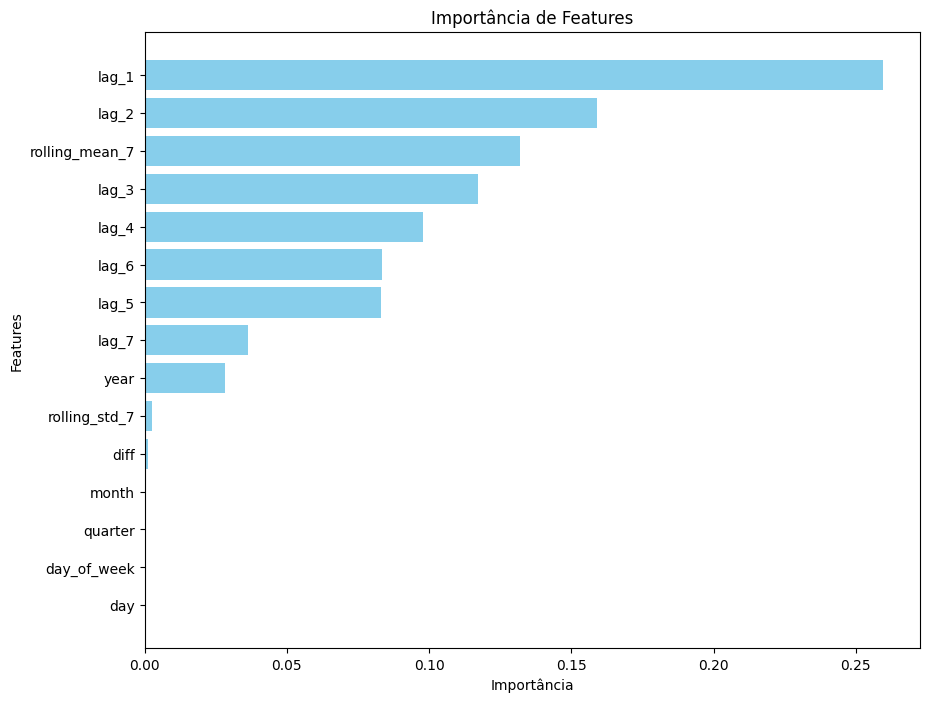

In [ ]:
# acessando o melhor modelo encontrado
best_model = search.best_estimator_

# extraindo o transformador de engenharia de features
feature_engineering = best_model.named_steps["feature_engineering"]

# transformando X para obter o nome das features geradas
X_transformed = feature_engineering.transform(X)
feature_names = X_transformed.columns

# acessando as importâncias das features
importances = best_model.named_steps["model"].feature_importances_

# DataFrame para as importâncias das features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância de Features")
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()

####Avaliando o modelo com as métricas de erro, e mostrando o gráfico da previsão vs resultado

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
import plotly.graph_objects as go

# extraindo as features e o target
X_test = test.copy()
y_test = test["Price"]

# previsões no conjunto de teste
y_pred = search.predict(X_test)

# avaliação da performance
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

# plot das previsões vs valores reais

# Dados para o gráfico
y_test_index = y_test.index
y_test_values = y_test.values.flatten()
y_pred_values = y_pred.flatten()

# Criação do gráfico interativo
fig = go.Figure()

# Adicionando os dados reais
fig.add_trace(go.Scatter(x=y_test_index, y=y_test_values,
                         mode='lines', name='Real'))

# Adicionando as previsões
fig.add_trace(go.Scatter(x=y_test_index, y=y_pred_values,
                         mode='lines', name='Previsões D+1', line=dict(dash='dash')))

# Atualizando layout do gráfico
fig.update_layout(title='Série Temporal - EIA366_PBRENT366',
                  xaxis_title='Data',
                  yaxis_title='US$',
                  legend=dict(x=0, y=1),
                  hovermode='x unified')

# Mostrar o gráfico
fig.show()


Mean Absolute Error: 1.9153410363750611
Mean Absolute Percentage Error: 0.029684452224106685
R² Score: 0.9817176556353869


In [ ]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

dias=10

# classe customizada para engenharia de features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, target, lags, window_size):
        self.target = target
        self.lags = lags
        self.window_size = window_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for lag in range(1, self.lags + 1):
            X[f"lag_{lag}"] = X[self.target].shift(lag)
        X[f"rolling_mean_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).mean()
        X["diff"] = X[self.target].shift(1).diff()
        X["month"] = X.index.month
        X["day_of_week"] = X.index.dayofweek
        X[f"rolling_std_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).std()
        X["day"] = X.index.day
        X["quarter"] = X.index.quarter
        X["year"] = X.index.year
        X = X.drop(columns=[self.target])
        X.fillna(0, inplace=True)
        return X

# pipeline de steps
pipeline = Pipeline([
    ("feature_engineering", FeatureEngineer(target="Price", lags=dias, window_size=dias)),
    ("scaler", StandardScaler()),
    ("model", RegressorChain(base_estimator=RandomForestRegressor()))
])


# espaço amostral de hiperparâmetros
param_grid = {
    "model__base_estimator__n_estimators": [100, 200],  # Número de árvores na floresta
    "model__base_estimator__max_depth": [10, 20],       # Profundidade máxima das árvores
    "model__base_estimator__min_samples_split": [2, 5], # Número mínimo de amostras para dividir um nó
    "model__base_estimator__max_features": ['auto', 'sqrt'],  # Número máximo de recursos a serem considerados para a melhor divisão
    "model__base_estimator__bootstrap": [True, False]   # Se usar ou não amostragem com substituição
}

# TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=3)

# HalvingGridSearchCV para busca de melhor combinação de hiperparâmetros
search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    factor=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

X = train.copy()  # inclui a coluna 'Price' no X para uso no pipeline de feature engineering
y = pd.concat([train["Price"].shift(-i) for i in range(0, dias)], axis=1).dropna()  # criando as colunas para previsão de D+X
y.columns = [f"Price_t{i+1}" for i in range(0, dias)]
X = X.iloc[:len(y)]  # alinhando X e y


# fit do modelo
search.fit(X, y)

# melhores hiperparâmetros e score
print("Best parameters found: ", search.best_params_)
print("Best score: ", search.best_score_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 373
max_resources_: 10073
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 373
Fitting 3 folds for each of 32 candidates, totalling 96 fits
----------
iter: 1
n_candidates: 11
n_resources: 1119
Fitting 3 folds for each of 11 candidates, totalling 33 fits
----------
iter: 2
n_candidates: 4
n_resources: 3357
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



----------
iter: 3
n_candidates: 2
n_resources: 10071
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'model__base_estimator__bootstrap': True, 'model__base_estimator__max_depth': 10, 'model__base_estimator__max_features': 'sqrt', 'model__base_estimator__min_samples_split': 5, 'model__base_estimator__n_estimators': 100}
Best score:  -1163.4124574427553


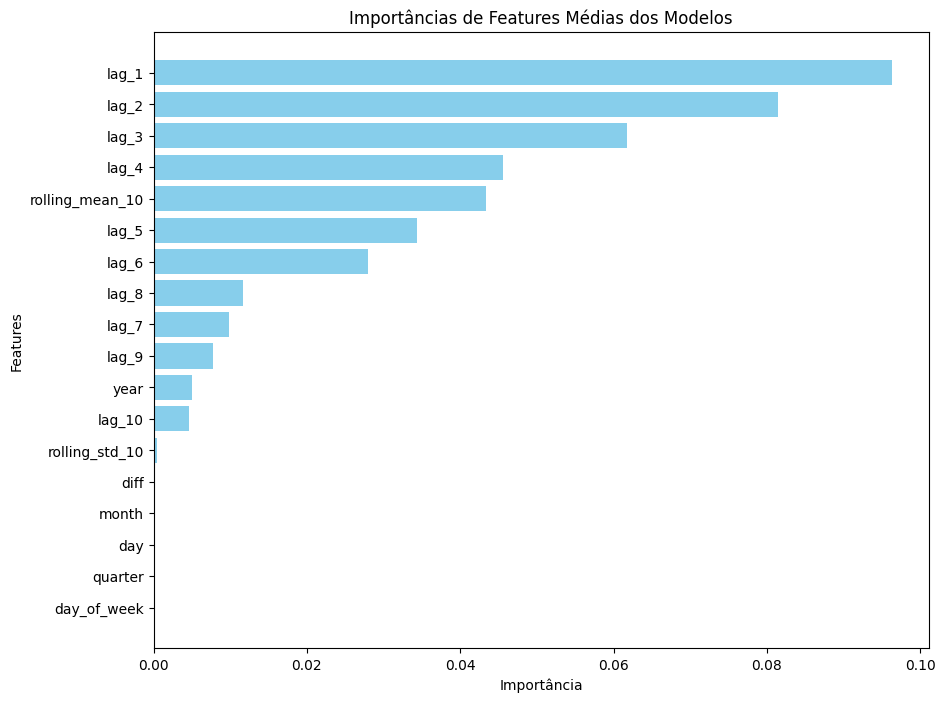

In [ ]:

# melhor modelo
best_pipeline = search.best_estimator_
best_regressor_chain = best_pipeline.named_steps["model"]

# extraindo o transformador de engenharia de features
feature_engineering = best_pipeline.named_steps["feature_engineering"]

# transformando X para obter as features geradas
X_transformed = feature_engineering.transform(X)
feature_names = X_transformed.columns

# inicializando a matriz para armazenar as importâncias das features
num_original_features = X_transformed.shape[1]
feature_importances = np.zeros(num_original_features)

# extraindo a importância de features de cada regressor na cadeia
for estimator in best_regressor_chain.estimators_:
    importances = estimator.feature_importances_[:num_original_features]
    feature_importances[:len(importances)] += importances

# normalizando as importâncias das features
feature_importances /= len(best_regressor_chain.estimators_)

# DataFrame para as importâncias das features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importâncias de Features Médias dos Modelos")
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# extraindo as features e o target
X_test = test.copy()
y_test = pd.concat([test["Price"].shift(-i) for i in range(1, dias+1)], axis=1).dropna()
y_test.columns = [f"Price_t{i}" for i in range(1, dias+1)]
X_test = X_test.iloc[:len(y_test)]  # alinhando X_test e y_test

# previsões no conjunto de teste
y_pred = search.predict(X_test)

# avaliação da performance
mae = mean_absolute_error(y_test, y_pred, multioutput="raw_values")
mape = mean_absolute_percentage_error(y_test, y_pred, multioutput="raw_values")
r2 = r2_score(y_test, y_pred, multioutput="raw_values")

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

Mean Absolute Error: [2.43683708 2.92409804 3.24025655 3.533714   3.82218497 4.06435746
 4.27926598 4.51458715 4.7057657  4.89104134]
Mean Absolute Percentage Error: [0.03805741 0.04565568 0.05101833 0.05596932 0.06079568 0.06515884
 0.06952471 0.07383097 0.07764392 0.08129095]
R² Score: [0.97293554 0.96437105 0.95798081 0.95101911 0.94340477 0.93724774
 0.93112908 0.92347112 0.91646931 0.91005252]


In [ ]:
pd.DataFrame({
    "Previsão": [f"D+{i}" for i in range(1, dias+1)],
    "Mean Absolute Error": mae,
    "Mean Absolute Percentage Error": mape,
    "R² Score": r2
})

,Previsão,Mean Absolute Error,Mean Absolute Percentage Error,R² Score
0,D+1,2.436837,0.038057,0.972936
1,D+2,2.924098,0.045656,0.964371
2,D+3,3.240257,0.051018,0.957981
3,D+4,3.533714,0.055969,0.951019
4,D+5,3.822185,0.060796,0.943405
5,D+6,4.064357,0.065159,0.937248
6,D+7,4.279266,0.069525,0.931129
7,D+8,4.514587,0.073831,0.923471
8,D+9,4.705766,0.077644,0.916469
9,D+10,4.891041,0.081291,0.910053


###Analisando ultimos 20 anos

###Importando todos os dados

In [ ]:
#importando dados
series = ip.list_series()
data = ip.timeseries('EIA366_PBRENT366')
data = data[["VALUE (US$)"]]
data.rename(columns={"VALUE (US$)": "Price"}, inplace=True)
data.index.name = "date"
data = data.dropna()
print(data)

            Price
date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
...           ...
2024-06-25  86.81
2024-06-26  85.76
2024-06-27  87.00
2024-06-28  87.26
2024-07-01  86.57

[11203 rows x 1 columns]


####Achando a data de 20 anos atras do dataframe, e filtrando por ela

In [ ]:
# Supondo que 'data' já esteja definido como no seu código
last_date = data.index[-1]
twenty_years_ago = last_date - pd.DateOffset(years=25)

# Filtrando o DataFrame para incluir apenas os últimos 20 anos
data20anos = data.loc[twenty_years_ago:]

print(data20anos)

            Price
date             
1999-07-01  17.25
1999-07-02  17.55
1999-07-06  18.47
1999-07-07  18.36
1999-07-08  18.74
...           ...
2024-06-25  86.81
2024-06-26  85.76
2024-06-27  87.00
2024-06-28  87.26
2024-07-01  86.57

[8129 rows x 1 columns]


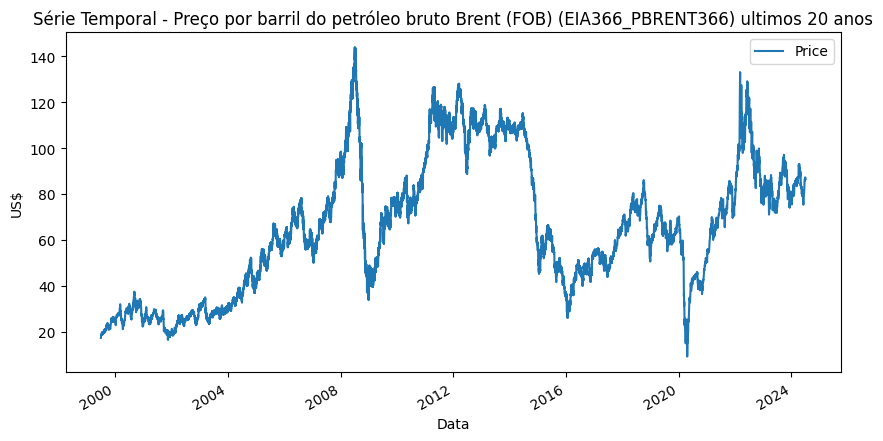

In [ ]:
data20anos[["Price"]].plot(figsize=(10, 5))
plt.title("Série Temporal - Preço por barril do petróleo bruto Brent (FOB) (EIA366_PBRENT366) ultimos 20 anos")
plt.xlabel("Data")
plt.ylabel("US$")
plt.show()

###Machine learning com os ultimos 20 anos

In [ ]:
# divisão manual dos dados de treino e teste
train_size = int(len(data20anos) * 0.9)
train, test = data20anos.iloc[:train_size], data20anos.iloc[train_size:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# classe customizada para engenharia de features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, target, lags, window_size):
        self.target = target
        self.lags = lags
        self.window_size = window_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for lag in range(1, self.lags + 1):
            X[f"lag_{lag}"] = X[self.target].shift(lag)
        X[f"rolling_mean_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).mean()
        X["diff"] = X[self.target].shift(1).diff()
        X["month"] = X.index.month
        X["day_of_week"] = X.index.dayofweek
        X[f"rolling_std_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).std()
        X["day"] = X.index.day
        X["quarter"] = X.index.quarter
        X["year"] = X.index.year
        X = X.drop(columns=[self.target])
        X.fillna(0, inplace=True)
        return X

# pipeline de steps
pipeline = Pipeline([
    ("feature_engineering", FeatureEngineer(target="Price", lags=7, window_size=7)),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor())
])

# espaço amostral de hiperparâmetros
param_grid = {
    "model__n_estimators": [100, 200],  # Número de árvores na floresta
    "model__max_depth": [10, 20],       # Profundidade máxima das árvores
    "model__min_samples_split": [2, 5], # Número mínimo de amostras para dividir um nó
    "model__max_features": ['auto', 'sqrt'],  # Número máximo de recursos a serem considerados para a melhor divisão
    "model__bootstrap": [True, False]   # Se usar ou não amostragem com substituição
}

# TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=3)

# HalvingGridSearchCV para busca de melhor combinação de hiperparâmetros
search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    factor=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

X = train.copy()  # inclui a coluna 'Price' no X para uso no pipeline de feature engineering
y = train["Price"]

# fit do modelo
search.fit(X, y)

# melhores hiperparâmetros e score
print("Best parameters found: ", search.best_params_)
print("Best score: ", search.best_score_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 270
max_resources_: 7316
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 270
Fitting 3 folds for each of 32 candidates, totalling 96 fits
----------
iter: 1
n_candidates: 11
n_resources: 810
Fitting 3 folds for each of 11 candidates, totalling 33 fits
----------
iter: 2
n_candidates: 4
n_resources: 2430
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 3
n_candidates: 2
n_resources: 7290
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Best parameters found:  {'model__bootstrap': False, 'model__max_depth': 10, 'model__max_features': 'auto', 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best score:  -692.9853253686364


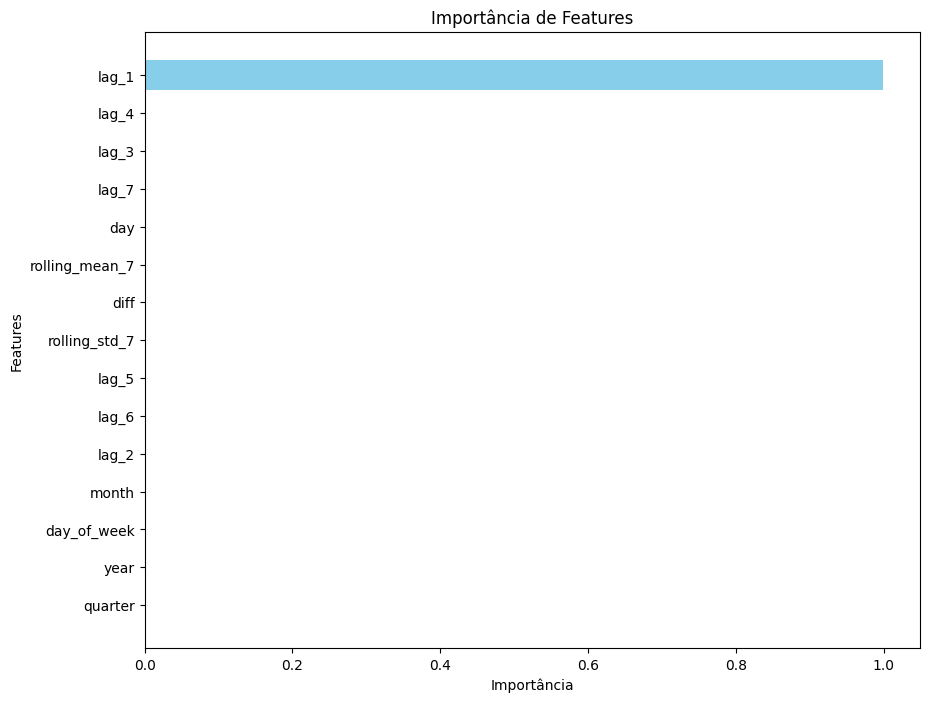

In [ ]:
# acessando o melhor modelo encontrado
best_model = search.best_estimator_

# extraindo o transformador de engenharia de features
feature_engineering = best_model.named_steps["feature_engineering"]

# transformando X para obter o nome das features geradas
X_transformed = feature_engineering.transform(X)
feature_names = X_transformed.columns

# acessando as importâncias das features
importances = best_model.named_steps["model"].feature_importances_

# DataFrame para as importâncias das features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância de Features")
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
import plotly.graph_objects as go

# extraindo as features e o target
X_test = test.copy()
y_test = test["Price"]

# previsões no conjunto de teste
y_pred = search.predict(X_test)

# avaliação da performance
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

# plot das previsões vs valores reais

# Dados para o gráfico
y_test_index = y_test.index
y_test_values = y_test.values.flatten()
y_pred_values = y_pred.flatten()

# Criação do gráfico interativo
fig = go.Figure()

# Adicionando os dados reais
fig.add_trace(go.Scatter(x=y_test_index, y=y_test_values,
                         mode='lines', name='Real'))

# Adicionando as previsões
fig.add_trace(go.Scatter(x=y_test_index, y=y_pred_values,
                         mode='lines', name='Previsões D+1', line=dict(dash='dash')))

# Atualizando layout do gráfico
fig.update_layout(title='Série Temporal - EIA366_PBRENT366',
                  xaxis_title='Data',
                  yaxis_title='US$',
                  legend=dict(x=0, y=1),
                  hovermode='x unified')

# Mostrar o gráfico
fig.show()


Mean Absolute Error: 2.3042691793205257
Mean Absolute Percentage Error: 0.026274522243957075
R² Score: 0.9311807137909577


[*********************100%%**********************]  1 of 1 completed
<ipython-input-26-5ac0ea9fe4fd>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



            Price        USDX
1987-05-20  18.63   95.389999
1987-05-21  18.45   95.559998
1987-05-22  18.55   95.830002
1987-05-25  18.60   95.830002
1987-05-26  18.63   97.449997
...           ...         ...
2024-06-24  86.75  105.470001
2024-06-25  86.81  105.610001
2024-06-26  85.76  106.050003
2024-06-27  87.00  105.910004
2024-06-28  87.26  105.870003

[9350 rows x 2 columns]


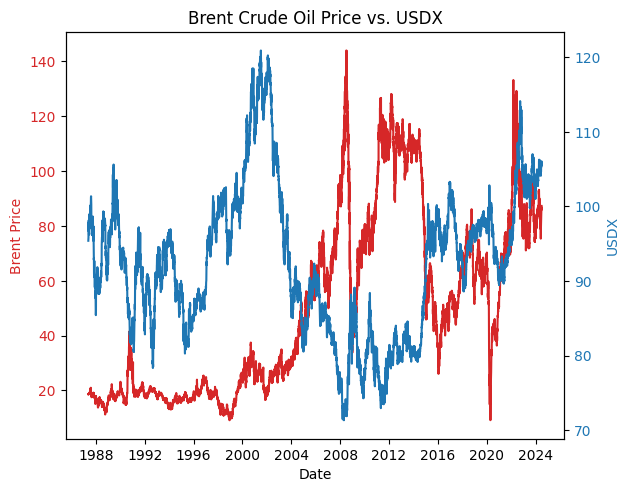

In [ ]:
import yfinance as yf
import datetime


# Define the date range based on your existing DataFrame
start_date = data.index.min()
end_date = data.index.max()

# Fetch USDX data from Yahoo Finance
usdx = yf.download('DX-Y.NYB', start=start_date, end=end_date)

# Select and rename relevant columns
usdx = usdx[['Close']]
usdx.rename(columns={'Close': 'USDX'}, inplace=True)

# Join the data
combined_data = data.join(usdx, how='inner')

# Handle any missing data (if necessary)
combined_data.dropna(inplace=True)

print(combined_data)

# Optionally, visualize the combined data
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Brent Price', color=color)
ax1.plot(combined_data.index, combined_data['Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('USDX', color=color)
ax2.plot(combined_data.index, combined_data['USDX'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Brent Crude Oil Price vs. USDX')
plt.show()

In [ ]:
correlation = combined_data['USDX'].corr(combined_data['Price'])

print(f'Correlation between USDX and Price: {correlation}')

Correlation between USDX and Price: -0.4158132514792737


In [ ]:
# divisão manual dos dados de treino e teste
train_size = int(len(combined_data) * 0.9)
train, test = combined_data.iloc[:train_size], combined_data.iloc[train_size:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# classe customizada para engenharia de features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, target, lags, window_size):
        self.target = target
        self.lags = lags
        self.window_size = window_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for lag in range(1, self.lags + 1):
            X[f"lag_{lag}"] = X[self.target].shift(lag)
        X[f"rolling_mean_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).mean()
        X["diff"] = X[self.target].shift(1).diff()
        X["month"] = X.index.month
        X["day_of_week"] = X.index.dayofweek
        X[f"rolling_std_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).std()
        X["day"] = X.index.day
        X["quarter"] = X.index.quarter
        X["year"] = X.index.year
        X = X.drop(columns=[self.target])
        X.fillna(0, inplace=True)
        return X

# pipeline de steps
pipeline = Pipeline([
    ("feature_engineering", FeatureEngineer(target="Price", lags=7, window_size=7)),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor())
])

# espaço amostral de hiperparâmetros
param_grid = {
    "model__n_estimators": [100, 200],  # Número de árvores na floresta
    "model__max_depth": [10, 20],       # Profundidade máxima das árvores
    "model__min_samples_split": [2, 5], # Número mínimo de amostras para dividir um nó
    "model__max_features": ['auto', 'sqrt'],  # Número máximo de recursos a serem considerados para a melhor divisão
    "model__bootstrap": [True, False]   # Se usar ou não amostragem com substituição
}

# TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=3)

# HalvingGridSearchCV para busca de melhor combinação de hiperparâmetros
search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    factor=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

X = train.copy()  # inclui a coluna 'Price' no X para uso no pipeline de feature engineering
y = train["Price"]

# fit do modelo
search.fit(X, y)

# melhores hiperparâmetros e score
print("Best parameters found: ", search.best_params_)
print("Best score: ", search.best_score_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 311
max_resources_: 8415
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 311
Fitting 3 folds for each of 32 candidates, totalling 96 fits
----------
iter: 1
n_candidates: 11
n_resources: 933
Fitting 3 folds for each of 11 candidates, totalling 33 fits
----------
iter: 2
n_candidates: 4
n_resources: 2799
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 3
n_candidates: 2
n_resources: 8397
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'model__bootstrap': False, 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score:  -1165.9477072261022


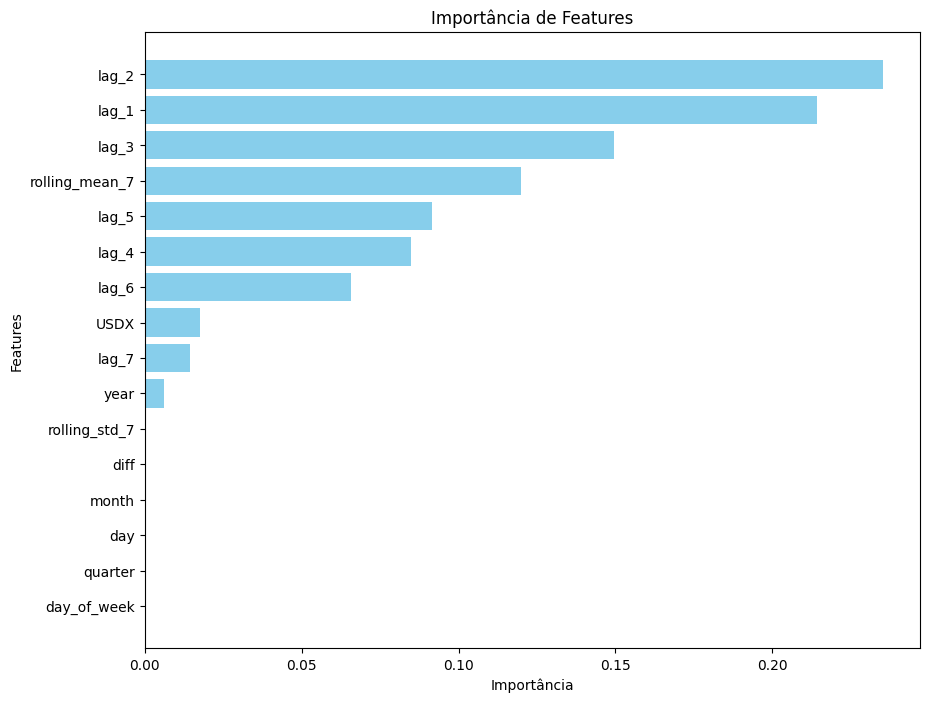

In [ ]:
# acessando o melhor modelo encontrado
best_model = search.best_estimator_

# extraindo o transformador de engenharia de features
feature_engineering = best_model.named_steps["feature_engineering"]

# transformando X para obter o nome das features geradas
X_transformed = feature_engineering.transform(X)
feature_names = X_transformed.columns

# acessando as importâncias das features
importances = best_model.named_steps["model"].feature_importances_

# DataFrame para as importâncias das features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância de Features")
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
import plotly.graph_objects as go

# extraindo as features e o target
X_test = test.copy()
y_test = test["Price"]

# previsões no conjunto de teste
y_pred = search.predict(X_test)

# avaliação da performance
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

# plot das previsões vs valores reais

# Dados para o gráfico
y_test_index = y_test.index
y_test_values = y_test.values.flatten()
y_pred_values = y_pred.flatten()

# Criação do gráfico interativo
fig = go.Figure()

# Adicionando os dados reais
fig.add_trace(go.Scatter(x=y_test_index, y=y_test_values,
                         mode='lines', name='Real'))

# Adicionando as previsões
fig.add_trace(go.Scatter(x=y_test_index, y=y_pred_values,
                         mode='lines', name='Previsões D+1', line=dict(dash='dash')))

# Atualizando layout do gráfico
fig.update_layout(title='Série Temporal - EIA366_PBRENT366',
                  xaxis_title='Data',
                  yaxis_title='US$',
                  legend=dict(x=0, y=1),
                  hovermode='x unified')

# Mostrar o gráfico
fig.show()


Mean Absolute Error: 1.9647604479504666
Mean Absolute Percentage Error: 0.02437047744907007
R² Score: 0.9753870548780821
